In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [3]:
net = pd.read_csv('Internet-Demographic.csv')

In [4]:
net

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income
...,...,...,...,...,...
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income
191,South Africa,ZAF,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income


In [6]:
net.isnull().sum()

Country Name      0
Country Code      0
Birth rate        0
Internet users    0
Income Group      0
dtype: int64

In [7]:
net.dtypes

Country Name       object
Country Code       object
Birth rate        float64
Internet users    float64
Income Group       object
dtype: object

In [8]:
net['Country Name'] = net['Country Name'].astype('category')
net['Country Code'] = net['Country Code'].astype('category')
net['Income Group'] = net['Income Group'].astype('category')

In [9]:
net.dtypes

Country Name      category
Country Code      category
Birth rate         float64
Internet users     float64
Income Group      category
dtype: object

<h1>Task 1</h1>

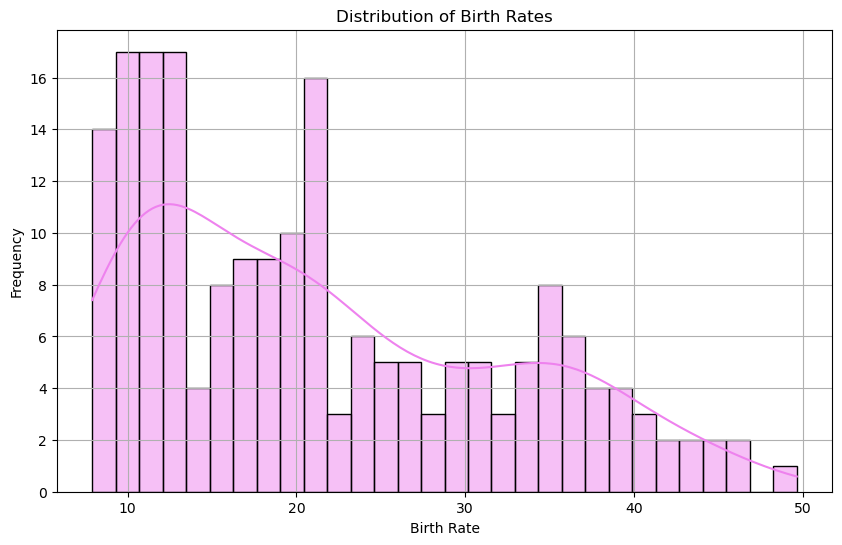

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(net['Birth rate'], bins=30, kde=True, color='violet')
plt.title('Distribution of Birth Rates')
plt.xlabel('Birth Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<h1>Task 2</h1>

In [43]:
top_5_internet_usage = net[['Country Name', 'Internet users']].nlargest(5, 'Internet users')
top_5_internet_usage

,Country Name,Internet users
84,Iceland,96.5468
22,Bermuda,95.3000
131,Norway,95.0534
163,Sweden,94.7836
47,Denmark,94.6297


<h3>Insight: The Top 5 Countries with the highest Internet Usage are Iceland, Bermuda, Norway, Sweden, and Denmark</h3>

<h1>Task 3</h1>

In [16]:
igroup_counts = net['Income Group'].value_counts()

In [17]:
igroup_counts

High income            67
Lower middle income    50
Upper middle income    48
Low income             30
Name: Income Group, dtype: int64

<h3>Insight: The number of countries belong to High Income are 67, Lower Middle Income are 50, Upper Middle Income are 48, Low Income are 30</h3>

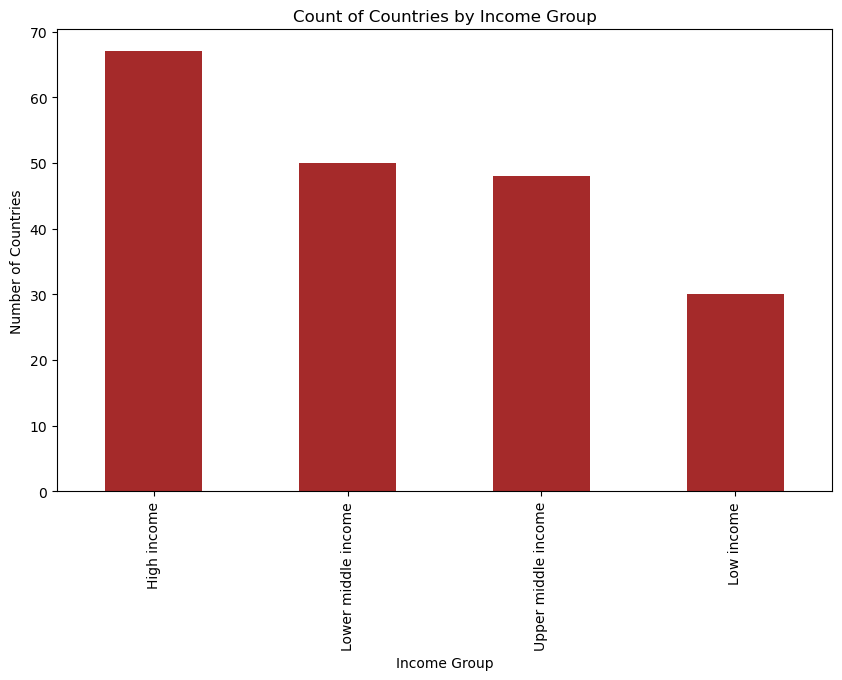

In [18]:
igroup_counts = net['Income Group'].value_counts()

plt.figure(figsize=(10, 6))
igroup_counts.plot(kind='bar', color='brown')
plt.title('Count of Countries by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Number of Countries')
plt.show()

<h1>Task 4</h1>

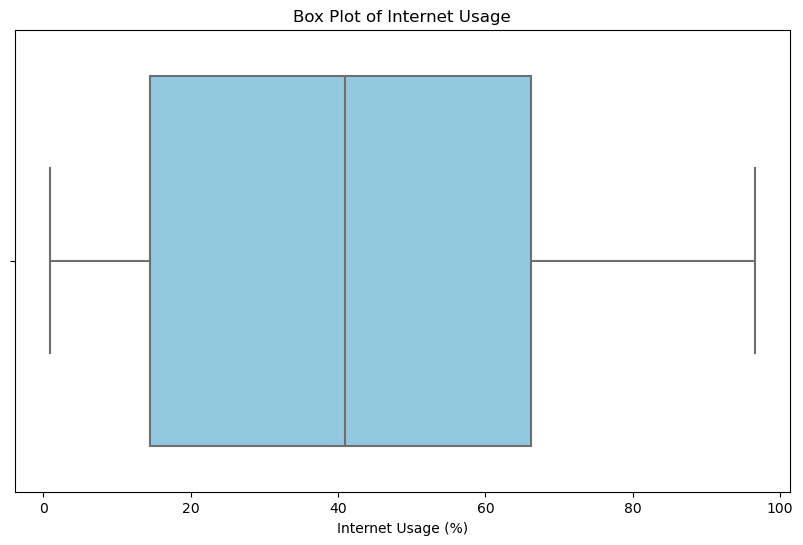

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=net['Internet users'], color='skyblue')
plt.title('Box Plot of Internet Usage')
plt.xlabel('Internet Usage (%)')
plt.show()

<h1>Task 5</h1>

In [22]:
no_internet = net[net['Internet users'] == 0]
print(no_internet[['Country Name']])

Empty DataFrame
Columns: [Country Name]
Index: []


<h3>Insight: There is no countries that has a 0% internet usage</h3>

<h1>Task 6</h1>

In [44]:
average_birth_rate = np.round(net['Birth rate'].mean(), 1)
average_birth_rate

21.5

<h3>Insight: The average of birth rate across all countries is 21.5</h3>

<h1>Task 7</h1>

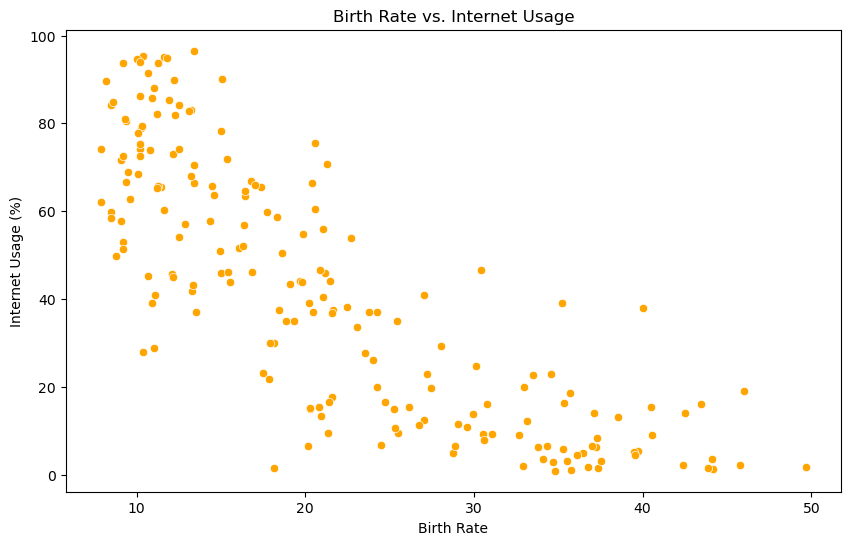

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=net['Birth rate'], y=net['Internet users'], color='orange')
plt.title('Birth Rate vs. Internet Usage')
plt.xlabel('Birth Rate')
plt.ylabel('Internet Usage (%)')
plt.show()

<h1>Task 8</h1>

In [33]:
high_birth_rate_countries = net[net['Birth rate'] > 40]
high_birth_rate_countries

,Country Name,Country Code,Birth rate,Internet users,Income Group
2,Angola,AGO,45.985,19.1,Upper middle income
11,Burundi,BDI,44.151,1.3,Low income
14,Burkina Faso,BFA,40.551,9.1,Low income
65,"Gambia, The",GMB,42.525,14.0,Low income
115,Mali,MLI,44.138,3.5,Low income
127,Niger,NER,49.661,1.7,Low income
128,Nigeria,NGA,40.045,38.0,Lower middle income
156,Somalia,SOM,43.891,1.5,Low income
167,Chad,TCD,45.745,2.3,Low income
178,Uganda,UGA,43.474,16.2,Low income


<h3>The countries with a Birth rate greater than 40 are Angola, Burundi, Burkina Faso, Gambia, Mali, Niger, Nigeria, Somalia, Chad, Uganda, Congo, Dem. Rep, Zambia</h3>

<h1>Task 9</h1>

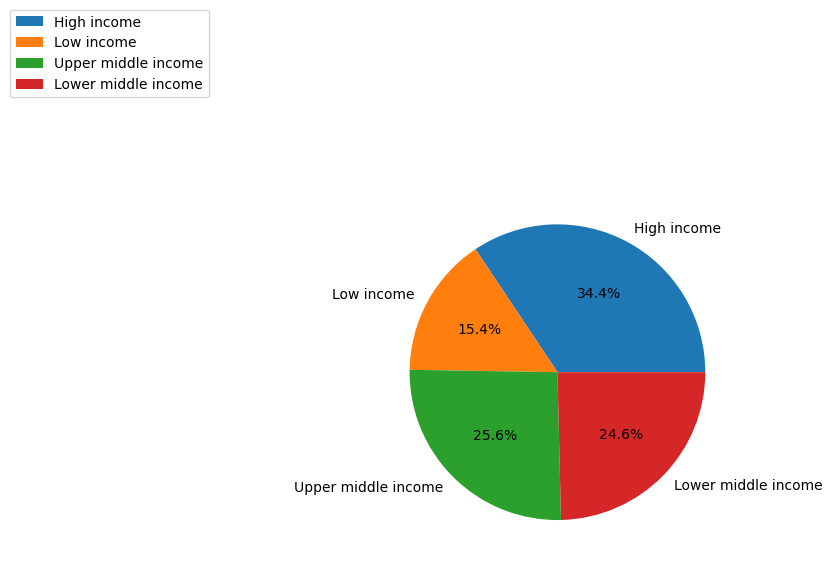

In [35]:
income = net.groupby(['Income Group']).size()

plt.pie(income, autopct='%1.1f%%', labels = net['Income Group'].unique())
plt.legend(loc='upper left', bbox_to_anchor=(-1, 1.5))
plt.show()

<h2>Insight: High Income constitute 34.4%, Upper Middle Income constitute 25.6%, Lower Midlle Income constitute 24.6%, and Low Income constitute 15.4%</h3>

<h1>Task 10</h1>

In [37]:
corr = net['Birth rate'].corr(net['Internet users'])
corr

-0.8155885551284763

<h3>Insight: There is a negative correlation between Birth Rate and Internet Users</h3>